# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [39]:
#Your code here
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [41]:

data = '/content/drive/MyDrive/CNN'



#Your code here



*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [32]:
data_iterator = train_dataset.as_numpy_iterator()

In [33]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

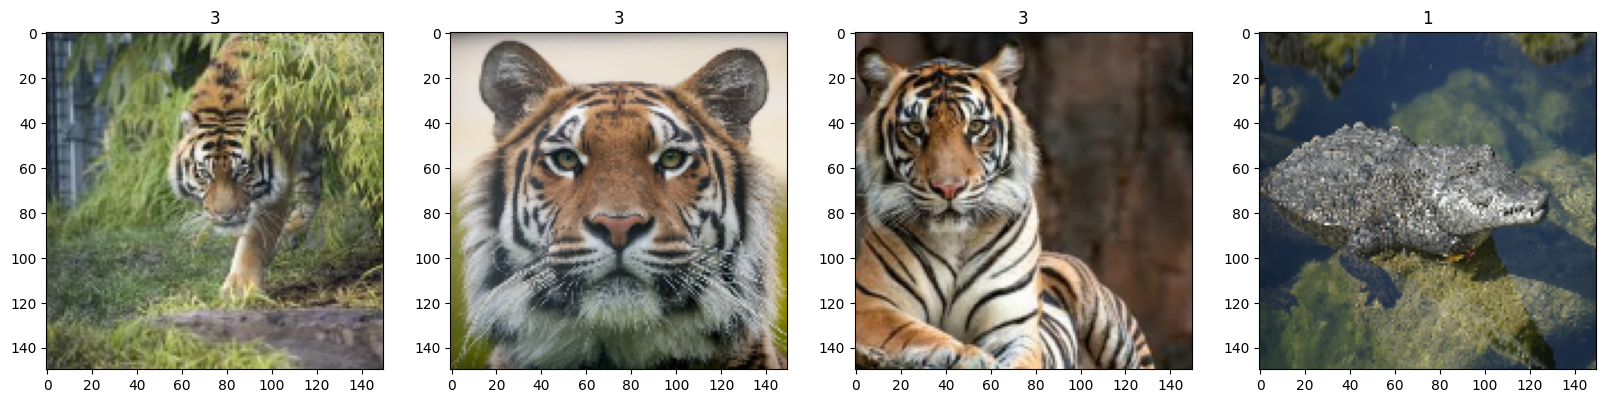

In [34]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [37]:
#data = train_dataset.map(lambda x, y: (x/255, y))#Your code here)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [57]:


# Define parameters
img_height, img_width = 128, 128
batch_size = 16
num_classes = 4  # Adjust this based on the number of classes



# Function to get all image file paths and their labels
def load_image_paths_and_labels(data):
    image_paths = []
    labels = []

    # Assuming folder names are the labels
    for label in os.listdir(data):
        label_folder = os.path.join(data, label)
        if os.path.isdir(label_folder):
            for image_file in os.listdir(label_folder):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(label_folder, image_file))
                    labels.append(label)

    return image_paths, labels

# Load all image paths and labels
image_paths, labels = load_image_paths_and_labels(data)

# Create a label map for converting class names to integers
label_map = {label: idx for idx, label in enumerate(np.unique(labels))}
num_classes = len(label_map)

# Convert labels to integers
labels = [label_map[label] for label in labels]

# Split data into training, validation, and test sets
train_paths, temp_paths, train_labels, temp_labels = train_test_split(image_paths, labels, test_size=0.4, stratify=labels)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, stratify=temp_labels)

# Create TensorFlow datasets
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image = image / 255.0  # Normalize to [0, 1]
    label = tf.one_hot(label, depth=num_classes)
    return image, label

def create_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(image_paths))  # Shuffle dataset
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(train_paths, train_labels)
val_dataset = create_dataset(val_paths, val_labels)
test_dataset = create_dataset(test_paths, test_labels)



In [58]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 128)      

**Q.6** Compile your model

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [59]:
epochs = 12
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset
)

Epoch 1/12
64/64 [==============================] - 71s 909ms/step - loss: 1.4427 - accuracy: 0.2787 - val_loss: 1.3740 - val_accuracy: 0.3964
Epoch 2/12
64/64 [==============================] - 64s 837ms/step - loss: 1.2998 - accuracy: 0.4002 - val_loss: 1.2662 - val_accuracy: 0.4172
Epoch 3/12
64/64 [==============================] - 62s 847ms/step - loss: 1.0528 - accuracy: 0.5494 - val_loss: 1.0852 - val_accuracy: 0.5621
Epoch 4/12
64/64 [==============================] - 66s 871ms/step - loss: 0.8442 - accuracy: 0.6719 - val_loss: 0.9838 - val_accuracy: 0.6331
Epoch 5/12
64/64 [==============================] - 65s 877ms/step - loss: 0.6713 - accuracy: 0.7569 - val_loss: 0.9176 - val_accuracy: 0.6331
Epoch 6/12
64/64 [==============================] - 64s 845ms/step - loss: 0.4866 - accuracy: 0.8340 - val_loss: 0.8426 - val_accuracy: 0.7012
Epoch 7/12
64/64 [==============================] - 64s 859ms/step - loss: 0.3315 - accuracy: 0.8864 - val_loss: 0.9253 - val_accuracy: 0.7130

In [60]:
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

**Q.8** Test your code with test set

In [61]:
# Evaluate the model on the test dataset
test_loss, accuracy = model.evaluate(test_dataset)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {accuracy}')

# Save the model
model.save('animal_classifier_model.h5')
#Your code here)

22/22 [==============================] - 8s 218ms/step - loss: 1.5963 - accuracy: 0.7041
Test loss: 1.5963351726531982
Test accuracy: 0.7041420340538025


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.7041420340538025


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**